**Dataset Aquisition**

In [1]:
from typing_extensions import final
import yfinance as yf
import pandas as pd


tickers = ['^GSPC','XLK', 'XLF', 'XLV', 'XLE', 'XLY','XLI']
#group_by parameter organizes the data by ticker symbols making it easier to process multiple stocks in one DataFrame
combined_data = yf.download(tickers,start="2000-04-01", end="2023-03-31", interval="1d", group_by='ticker')

# Convert MultiIndex columns into a long format using stack
# Level 0 in the MultiIndex represents the tickers
# The stack(level=0) function moves these tickers into rows, creating a long-format DataFrame.
final_data = combined_data.stack(level=0)
print(final_data.head())
# Reset the index to flatten the DataFrame
final_data = final_data.reset_index()
print(final_data.head())
final_data.rename(columns={
    'level_1': 'Ticker',
}, inplace=True)

print(final_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed
<ipython-input-1-6be8a31f4c4a>:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  final_data = combined_data.stack(level=0)


Price                   Open       High        Low      Close   Volume
Date       Ticker                                                     
2000-04-03 XLE     15.309728  15.471908  15.252966  15.471908   140700
           XLF     12.245447  12.569728  12.183679  12.569728   539917
           XLI     18.654576  18.714239  18.505419  18.664520    39400
           XLK     44.762715  44.762715  42.844981  43.406269  2645000
           XLV     21.234492  21.234492  21.052084  21.052084    11200
Price       Date Ticker       Open       High        Low      Close   Volume
0     2000-04-03    XLE  15.309728  15.471908  15.252966  15.471908   140700
1     2000-04-03    XLF  12.245447  12.569728  12.183679  12.569728   539917
2     2000-04-03    XLI  18.654576  18.714239  18.505419  18.664520    39400
3     2000-04-03    XLK  44.762715  44.762715  42.844981  43.406269  2645000
4     2000-04-03    XLV  21.234492  21.234492  21.052084  21.052084    11200
Price       Date Ticker       Open       

In [2]:
final_data.to_csv('melted_data.csv')

In [3]:
final_data.head(10)

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2000-04-03,XLE,15.309728,15.471908,15.252966,15.471908,140700
1,2000-04-03,XLF,12.245447,12.569728,12.183679,12.569728,539917
2,2000-04-03,XLI,18.654576,18.714239,18.505419,18.664520,39400
3,2000-04-03,XLK,44.762715,44.762715,42.844981,43.406269,2645000
4,2000-04-03,XLV,21.234492,21.234492,21.052084,21.052084,11200
5,2000-04-03,XLY,22.171731,22.650677,22.171731,22.533861,41000
6,2000-04-03,^GSPC,1498.579956,1507.189941,1486.959961,1505.969971,1021700000
7,2000-04-04,XLE,15.569214,15.650304,15.017804,15.277291,414600
8,2000-04-04,XLF,12.600615,12.662381,11.604611,12.067868,1568048
9,2000-04-04,XLI,18.694345,19.012547,17.739741,18.455694,220700


Original data shape: (40495, 8)
   Unnamed: 0        Date Ticker       Open       High        Low      Close  \
0           0  2000-04-03    XLE  15.429126  15.592570  15.371921  15.592570   
1           1  2000-04-03    XLF  12.289934  12.615393  12.227942  12.615393   
2           2  2000-04-03    XLI  18.711873  18.771719  18.562258  18.721848   
3           3  2000-04-03    XLK  44.841295  44.841295  42.920194  43.482468   
4           4  2000-04-03    XLV  21.316648  21.316648  21.133533  21.133533   

    Volume  
0   140700  
1   539917  
2    39400  
3  2645000  
4    11200  


<ipython-input-1-a9cb546432de>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Ticker', group_keys=False).apply(calculate_log_returns)
<ipython-input-1-a9cb546432de>:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Ticker', group_keys=False).apply(calculate_technical_indicators)


Data shape after cleaning: (40278, 19)
Train set shape: (32222, 9)
Test set shape: (8056, 9)
For n_clusters = 2
Silhouette Score: 0.3887
Davies-Bouldin Score: 1.5546
--------------------------------------------------
For n_clusters = 3
Silhouette Score: 0.3595
Davies-Bouldin Score: 1.5583
--------------------------------------------------
For n_clusters = 4
Silhouette Score: 0.2446
Davies-Bouldin Score: 1.5304
--------------------------------------------------
For n_clusters = 5
Silhouette Score: 0.2289
Davies-Bouldin Score: 1.5834
--------------------------------------------------
For n_clusters = 6
Silhouette Score: 0.2129
Davies-Bouldin Score: 1.6085
--------------------------------------------------
For n_clusters = 7
Silhouette Score: 0.1438
Davies-Bouldin Score: 1.5925
--------------------------------------------------
For n_clusters = 8
Silhouette Score: 0.2047
Davies-Bouldin Score: 1.4764
--------------------------------------------------
For n_clusters = 9
Silhouette Score: 0.

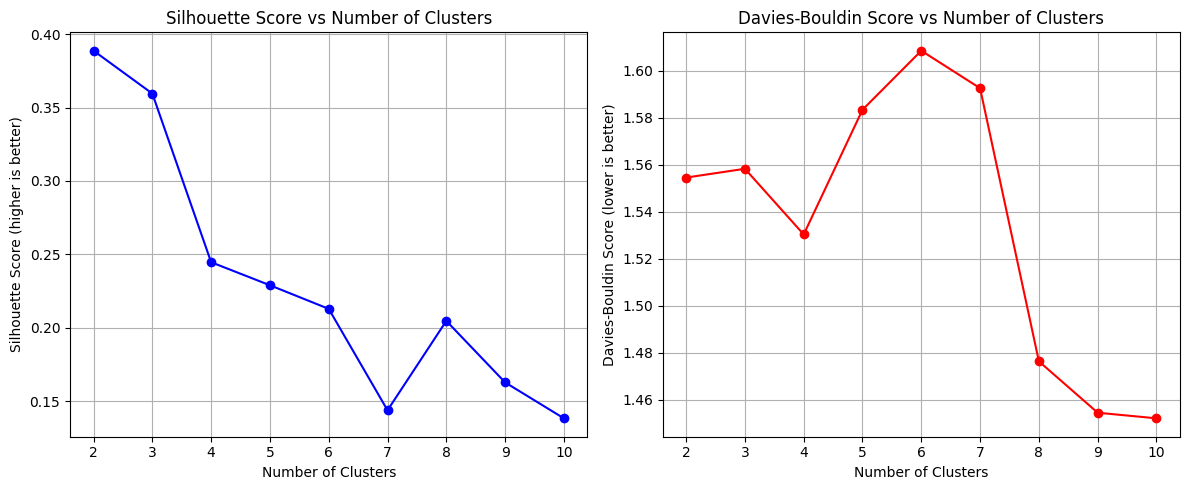

Optimal number of clusters based on Silhouette Score: 2
Optimal number of clusters based on Davies-Bouldin Score: 10


<ipython-input-1-a9cb546432de>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster'] = optimal_kmeans.labels_


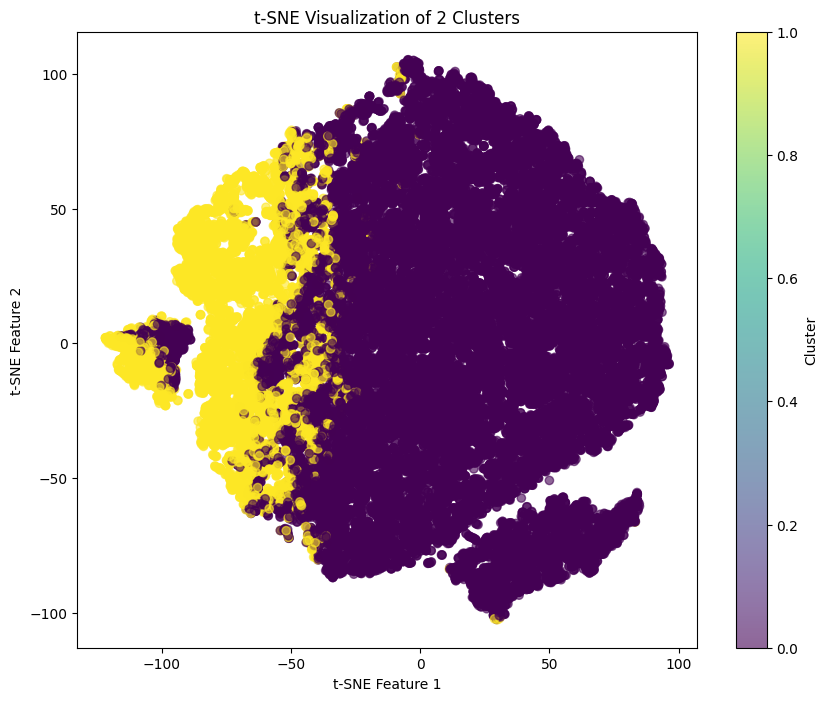


Cluster Centers (Mean values of features for each cluster):
         log_return    lag_1d    lag_5d   lag_30d  volatility_5d  \
cluster                                                            
0          0.001781  0.002621  0.008631  0.027240       0.009861   
1         -0.006377 -0.010014 -0.030642 -0.077532       0.021807   

         volatility_30d       macd     rs_5d    rs_30d  
cluster                                                 
0              0.011233   3.532806  1.004022  1.016957  
1              0.019925 -10.331689  0.985468  0.948255  

Tickers distribution across clusters:
Ticker
XLE      2
XLF      2
XLI      2
XLK      2
XLV      2
XLY      2
^GSPC    2
dtype: int64

Clustering performance on test set:
Silhouette Score: 0.3975
Davies-Bouldin Score: 1.5745


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/melted_data.csv')
print("Original data shape:", data.shape)
print(data.head())

#Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Sort by Date and Ticker to ensure time consistency
data = data.sort_values(['Ticker', 'Date'])

#Calculate log returns for each ticker
def calculate_log_returns(group):
    group['log_return'] = np.log(group['Close'] / group['Close'].shift(1))
    return group

data = data.groupby('Ticker', group_keys=False).apply(calculate_log_returns)

#Technical indicators for each ticker
def calculate_technical_indicators(group):
    #Lagged returns
    group['lag_1d'] = group['log_return'].shift(1)
    group['lag_5d'] = group['log_return'].shift(1).rolling(window=5).sum()
    group['lag_30d'] = group['log_return'].shift(1).rolling(window=30).sum()

    #Rolling averages
    group['roll_mean_5d'] = group['Close'].rolling(window=5).mean()
    group['roll_mean_30d'] = group['Close'].rolling(window=30).mean()

    #Volatility
    group['volatility_5d'] = group['log_return'].rolling(window=5).std()
    group['volatility_30d'] = group['log_return'].rolling(window=30).std()

    #MACD-like indicator
    group['macd'] = group['roll_mean_5d'] - group['roll_mean_30d']

    #Relative strength
    group['rs_5d'] = group['Close'] / group['roll_mean_5d']
    group['rs_30d'] = group['Close'] / group['roll_mean_30d']

    return group

data = data.groupby('Ticker', group_keys=False).apply(calculate_technical_indicators)

#Drop rows with NaN values
data_clean = data.dropna()
print(f"Data shape after cleaning: {data_clean.shape}")

#Create features for clustering
features = [
    'log_return', 'lag_1d', 'lag_5d', 'lag_30d',
    'volatility_5d', 'volatility_30d', 'macd',
    'rs_5d', 'rs_30d'
]

X =data_clean[features].copy()

# Standardize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Split data into train and test (80% train, 20% test)
#Using time-based split to respect time series nature
train_idx = data_clean.index[:int(len(data_clean) * 0.8)]
test_idx = data_clean.index[int(len(data_clean) * 0.8):]

X_train = X_scaled[train_idx - min(data_clean.index)]
X_test = X_scaled[test_idx - min(data_clean.index)]

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

#Evaluate different numbers of clusters
max_clusters = 10
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in range(2, max_clusters + 1):
    #Train K-means on training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_train)

    #Get cluster labels for train set
    train_labels = kmeans.labels_

    #Calculate silhouette score
    sil_score = silhouette_score(X_train, train_labels)
    silhouette_scores.append(sil_score)

    #Calculate Davies-Bouldin score
    db_score = davies_bouldin_score(X_train, train_labels)
    davies_bouldin_scores.append(db_score)

    print(f"For n_clusters = {n_clusters}")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies-Bouldin Score: {db_score:.4f}")
    print("-" * 50)

#Plot the evaluation metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores, 'o-', color='blue')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (higher is better)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, 'o-', color='red')
plt.title('Davies-Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score (lower is better)')
plt.grid(True)

plt.tight_layout()
plt.savefig('cluster_evaluation.png')
plt.show()

#Determine optimal number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on Silhouette Score: {optimal_n_clusters}")

#Alternative optimal based on Davies-Bouldin
alt_optimal = np.argmin(davies_bouldin_scores) + 2
print(f"Optimal number of clusters based on Davies-Bouldin Score: {alt_optimal}")


optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
optimal_kmeans.fit(X_scaled)
data_clean['cluster'] = optimal_kmeans.labels_


from sklearn.manifold import TSNE

#Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

#Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_clean['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title(f't-SNE Visualization of {optimal_n_clusters} Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.savefig('tsne_clusters.png')
plt.show()

#Analyze the clusters
cluster_analysis = data_clean.groupby('cluster')[features].mean()
print("\nCluster Centers (Mean values of features for each cluster):")
print(cluster_analysis)

#Count tickers in each cluster
ticker_clusters = data_clean.groupby(['cluster', 'Ticker']).size().unstack(fill_value=0)
print("\nTickers distribution across clusters:")
print(ticker_clusters.astype(bool).sum())

#Evaluate cluster quality on test set
test_labels = optimal_kmeans.predict(X_test)
test_silhouette = silhouette_score(X_test, test_labels)
test_db = davies_bouldin_score(X_test, test_labels)

print("\nClustering performance on test set:")
print(f"Silhouette Score: {test_silhouette:.4f}")
print(f"Davies-Bouldin Score: {test_db:.4f}")

In [ ]:
import pandas as pd
data=pd.read_csv('/content/melted_data.csv')

In [ ]:
data.shape

(40495, 8)